# Regression

<a id='1001'></a>
### Simple Linear Regression

#### What is Simple Linear Regression?

* Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line

![Linear Regression](regression1.png)

* The goal is to draw a linear line on the data that minimizes the Mean Squared Error (MSE).

![MSE](regression2.png)

As seen in the figure, the red line is the optimal line that minimizes the Mean Squared Error.

![MSE](regression3.png)

#### Simple Linear Regression Model Training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("linear_regression.csv",sep = ";")
df.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


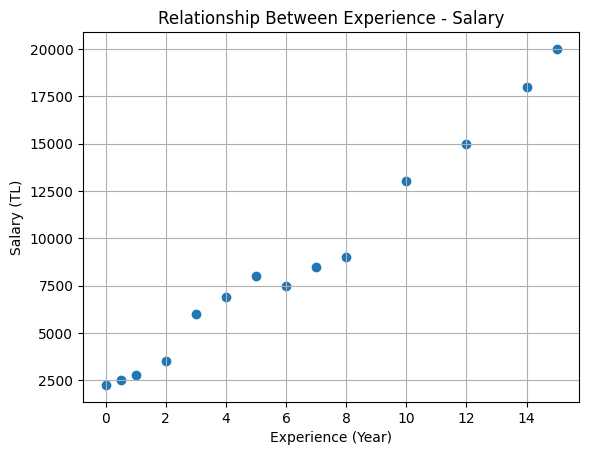

In [3]:
plt.scatter(df.experience,df.salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Relationship Between Experience - Salary")
plt.grid(True)
plt.show()

In [4]:
linear_reg = LinearRegression()

X = df.experience.values.reshape(-1,1)
y = df.salary.values.reshape(-1,1)

linear_reg.fit(X,y)

LinearRegression()

In [5]:
y_axis_intersection = np.array([0]).reshape(1,-1)
b0 = linear_reg.predict(y_axis_intersection)
print("**Starting salary of an inexperienced person: ",b0)

b0_ = linear_reg.intercept_
print("Starting salary of an inexperienced person: ",b0_)   

b1 = linear_reg.coef_
print("Increased salary for every 1 year of experience: ",b1)   

**Starting salary of an inexperienced person:  [[1663.89519747]]
Starting salary of an inexperienced person:  [1663.89519747]
Increased salary for every 1 year of experience:  [[1138.34819698]]


In [6]:
experience = 11

new_salary = 1663.89519747 + 1138.34819698*experience
print(new_salary)

result = linear_reg.predict(np.array([experience]).reshape(1,-1))
print("Salary of a person who has 11 years of experience: {} TL".format(result[0]))

14185.72536425
Salary of a person who has 11 years of experience: [14185.72536421] TL


#### Prediction/Visualization with Simple Linear Regression

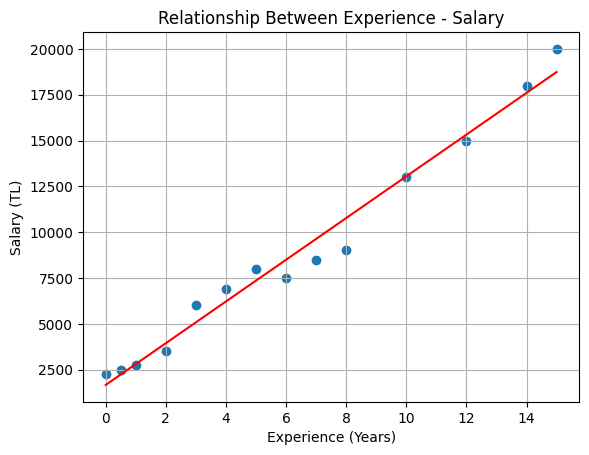

In [7]:
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)

plt.figure()
plt.scatter(X,y)


y_head = linear_reg.predict(array) 

plt.plot(array, y_head,color = "red")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (TL)")
plt.title("Relationship Between Experience - Salary")
plt.grid(True)
plt.show()

<a id='1002'></a>
### Multiple Linear Regression

#### What is Multiple Linear Regression

* Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.

![Multiple Linear Regression](regression4.png)

#### Multiple Linear Regression Model Training

In [8]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv("multiple_linear_regression.csv",sep = ";")
df.head()

,experience,salary,age
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [10]:
# Experience and age are independent variables
X = df.iloc[:,[0,2]].values 
X

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [11]:
# Salary is a dependent variable
y = df.salary.values.reshape(-1,1)
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]], dtype=int64)

In [12]:
multiple_linear_regression = LinearRegression()

multiple_linear_regression.fit(X,y)

LinearRegression()

In [13]:
test_data1 = np.array([[10,35]]) # deneyim = 10 ve yaş = 35
test_result1 = multiple_linear_regression.predict(test_data1)
print("Salary of a person who has 10 years of experience and is 35 years old: {} USD".format(test_result1[0]))

Salary of a person who has 10 years of experience and is 35 years old: [11046.35815877] USD


In [14]:
test_data2 = np.array([[5,35]])
test_result2 = multiple_linear_regression.predict(test_data2)
print("Salary of a person who has 5 years of experience and is 35 years old: {} USD".format(test_result2[0]))

Salary of a person who has 5 years of experience and is 35 years old: [3418.85455609] USD


<a id='1003'></a>
### Polynomial Regression

#### What is Polynomial Regression

* It is the analysis method used when the relationship between the variables is not linear.

![Polynomial Regression](regression5.png)

* If we apply linear regression to a non-linear data set, we will not get a good result. Therefore, using polynomial regression on the nonlinear data set will give better results.

![Polynomial Regression](regression6.png)

#### Polinomial Regression Model Training

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression # doğrusal
from sklearn.preprocessing import PolynomialFeatures # polinomsal


In [17]:
df = pd.read_csv("polynomial_regression.csv",sep = ";")
df.head()

,car_price,car_max_speed
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [18]:
y = df.car_max_speed.values.reshape(-1,1)
X = df.car_price.values.reshape(-1,1)

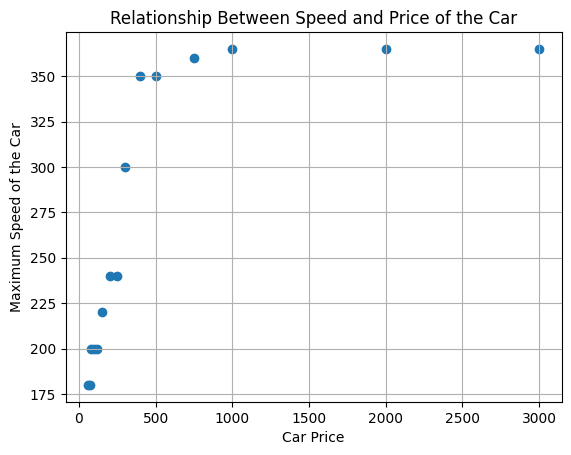

In [19]:
plt.scatter(X,y)
plt.ylabel("Maximum Speed of the Car")
plt.xlabel("Car Price")
plt.title("Relationship Between Speed and Price of the Car")
plt.grid(True)
plt.show()

* First of all, let's try the linear regression methods that we learned in the previous chapters.

In [20]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

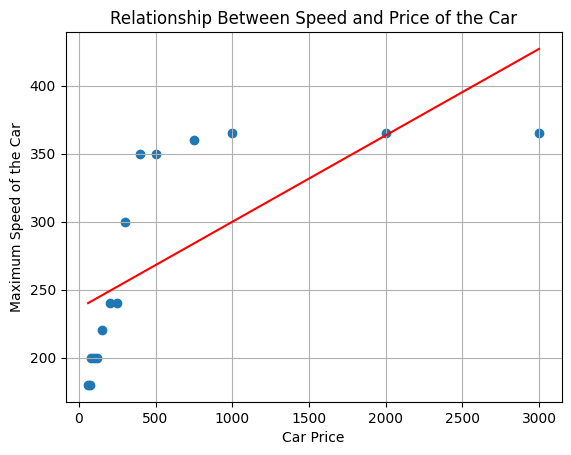

Speed of 10 Million Dollar Car:  [[871.66401826]]


In [21]:
y_pred1 = lr.predict(X)

plt.scatter(X,y)
plt.plot(X,y_pred1,color="red")
plt.ylabel("Maximum Speed of the Car")
plt.xlabel("Car Price")
plt.title("Relationship Between Speed and Price of the Car")
plt.grid(True)
plt.show()

car_price = 10000
print("Speed of 10 Million Dollar Car: ",lr.predict((np.array([car_price]).reshape(1,-1))))

* Now let's try the Polynomial regression method.

In [22]:
polynomial_regression = PolynomialFeatures(degree = 4)

X_polynom = polynomial_regression.fit_transform(X)
X_polynom
# Outputs are b0 + b1*x +b2*x^2 + b3*x^3 + ... + bn*x^n for n = 4 respectively.

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [23]:
lr2 = LinearRegression()
lr2.fit(X_polynom, y)

LinearRegression()

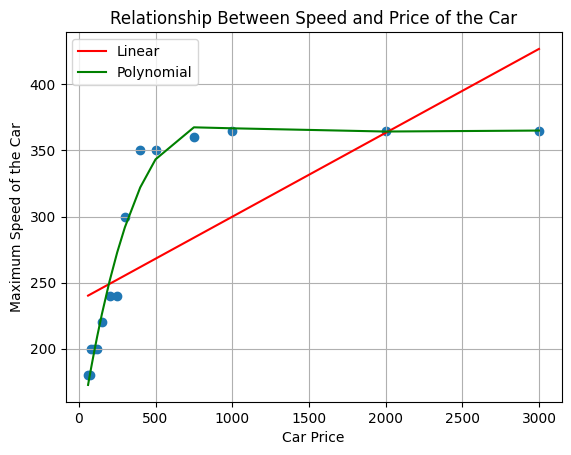

In [24]:
y_pred2 = lr2.predict(X_polynom)

plt.scatter(X,y)
plt.plot(X,y_pred1,color="red",label ="Linear")
plt.plot(X,y_pred2,color= "green",label = "Polynomial")
plt.legend()
plt.ylabel("Maximum Speed of the Car")
plt.xlabel("Car Price")
plt.title("Relationship Between Speed and Price of the Car")
plt.grid(True)
plt.show()



<a id='1004'></a>
### Evaluation of Regression Models

#### What Is R-Squared? 

* R squared (R2) is one of the most well-known evaluation measures in regression.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

![R-squared](regression7.png)

* The most common interpretation of the R square is how well the regression model fits the observed data. For example, an R squared of 60% indicates that 60% of the data fit the regression model. In general, a higher R square indicates a better fit for the model.

#### Evaluation of Regression Models With R-Squared

* In this section, we will create linear regression and polynomial regression models and evaluate these two models with the R Square method.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [26]:
df = pd.read_csv("linear_regression.csv",sep = ";") # veri noktalı virgül ile ayrıldığı için sep = seperator
df.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


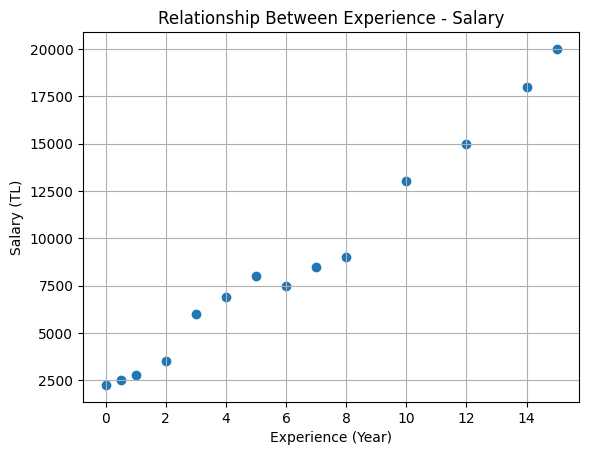

In [27]:
plt.scatter(df.experience,df.salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Relationship Between Experience - Salary")
plt.grid(True)
plt.show()

In [28]:
X = df.experience.values.reshape(-1,1)
y = df.salary.values.reshape(-1,1)

In [29]:
linear_reg = LinearRegression()

linear_reg.fit(X,y)

LinearRegression()

In [30]:
polynom_regression = PolynomialFeatures(degree = 2)

x_polynom = polynom_regression.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(x_polynom, y)

LinearRegression()

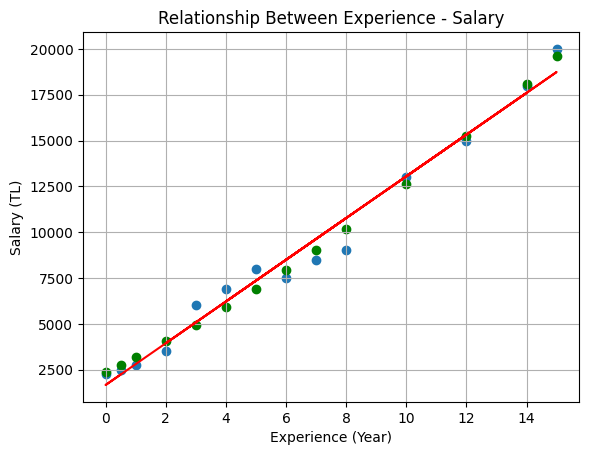

In [31]:
y_pred_linear = linear_reg.predict(X) 
y_pred_poly = poly_reg.predict(x_polynom) 

plt.scatter(X,y)
plt.plot(X, y_pred_linear,color = "red", label = "Linear" ) # (deneyim, maaş)
plt.scatter(X, y_pred_poly,color = "green", label = "Polynomial" ) # (deneyim, maaş)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary (TL)")
plt.title("Relationship Between Experience - Salary")
plt.grid(True)
plt.show()

In [32]:
print("R-Squared for Linear Regression:{} ", r2_score(y,y_pred_linear))
print("R-Squared for Polynomial Regression:{} ", r2_score(y,y_pred_poly))

R-Squared for Linear Regression:{}  0.9775283164949903
R-Squared for Polynomial Regression:{}  0.9854449464578782
